In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
glucose = pd.read_csv('../data/glucose.csv')

In [4]:
glbl = 'Historic Glucose mmol/L'
tlbl = 'Device Timestamp'
t_ = 'dtime'

In [5]:
glucose['dtime']=pd.to_datetime(glucose[tlbl], format='%d-%m-%Y %H:%M')

In [6]:
glucose.set_index(t_, inplace=True)

<AxesSubplot:xlabel='dtime'>

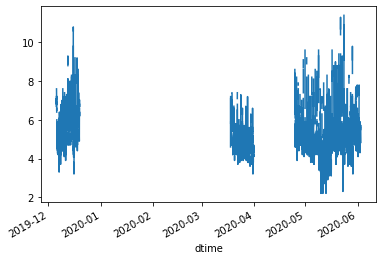

In [7]:
glucose[glbl].plot()

In [8]:
glucose['2020-03-15':'2020-05-30']

AssertionError: <class 'numpy.ndarray'>

<AxesSubplot:xlabel='dtime'>

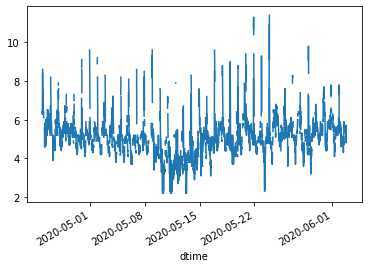

In [9]:
glucose.loc['2020-04-01':'2020-06-15'][glbl].plot()

<AxesSubplot:xlabel='dtime'>

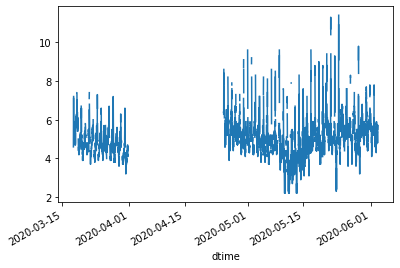

In [10]:
glucose.loc['2020'][glbl].plot()

In [11]:
gl = glucose[[glbl]].loc['2020-04':]

<AxesSubplot:xlabel='dtime'>

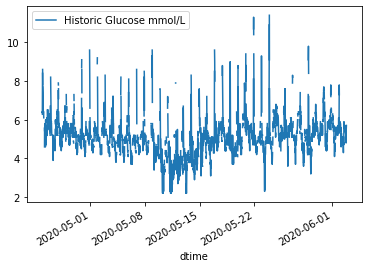

In [12]:
gl.plot()

In [13]:
gl.index.max()

Timestamp('2020-06-02 20:17:00')

In [14]:
gl.index.min()

Timestamp('2020-04-24 18:33:00')

In [15]:
gl[glbl].dropna(inplace=True)

In [16]:
gl.dropna(inplace=True)

In [17]:
oneday = '2020-05-01'
twoday = '2020-06-01'
g = gl.loc[oneday]
g1 = gl.loc[twoday]

In [18]:
gl['t_']=gl.index.hour*100+gl.index.minute

In [19]:
plt.plot(g.t_, g[glbl])
plt.plot(g1.t_, g1[glbl])
plt.xticks(rotation=45)
plt.show()

AttributeError: 'DataFrame' object has no attribute 't_'

AttributeError: 'DataFrame' object has no attribute 't_'

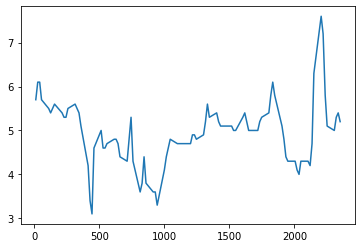

In [20]:
plt.plot(gl.loc['2020-05-15'].t_, gl.loc['2020-05-15'][glbl])
plt.plot(g1.t_, g1[glbl])
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='dtime'>

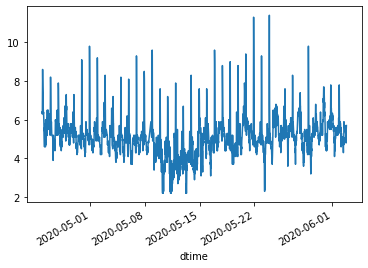

In [21]:
gl[glbl].plot()

In [22]:
def normalize(df):
    return (df-df.mean())/df.std()

# Derivative

In [143]:
def derive(recv):
    return recv.diff()/recv.index.to_series().diff().dt.total_seconds()

In [144]:
def time_diff(recv): 
    return recv.index.to_series().diff().dt.total_seconds()

In [166]:
g['_1']=derive(g[glbl])
g['_2']=derive(g._1)
g['_3']=derive(g._2)

<ipython-input-166-6da945edb6c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g['_1']=derive(g[glbl])
<ipython-input-166-6da945edb6c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g['_2']=derive(g._1)
<ipython-input-166-6da945edb6c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

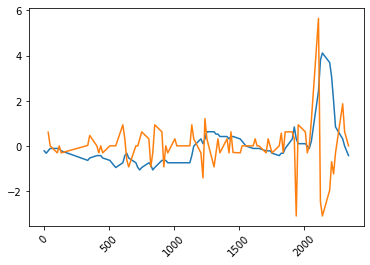

In [170]:

plt.plot(g.t_, normalize(g[glbl]))
plt.plot(g.t_, normalize(derive(g._1)))
plt.xticks(rotation=45)
plt.show()

In [192]:
y5 = g.rolling(5).mean()
y10 = g.rolling(10).mean()

In [202]:
abs(-1)

1

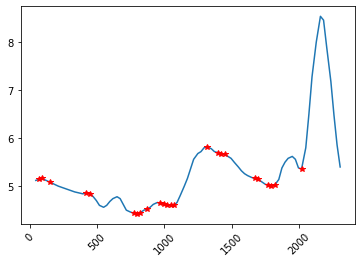

In [213]:
dot = y5[abs(derive(y5[glbl]))<=0.00004]
plt.plot(y5.t_, y5[glbl])
plt.plot(dot.t_, dot[glbl], color='red', linestyle='none', marker='*')
plt.xticks(rotation=45)
plt.show()

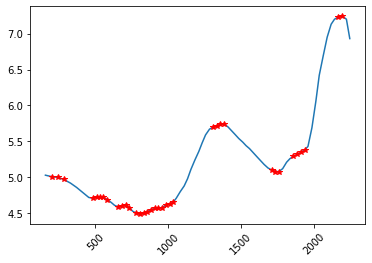

In [214]:
dott = y10[abs(derive(y10[glbl]))<=0.00004]
plt.plot(y10.t_, y10[glbl])
plt.plot(dott.t_, dott[glbl], color='red', linestyle='none', marker='*')
plt.xticks(rotation=45)
plt.show()

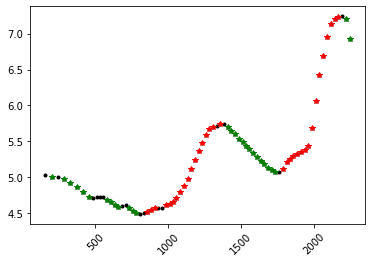

In [221]:
dott = y10[derive(y10[glbl]) > 0.00002]
downdott = y10[derive(y10[glbl]) < -0.00002]
plt.plot(y10.t_, y10[glbl], color='black', linestyle='none', marker='.')
plt.plot(dott.t_, dott[glbl], color='red', linestyle='none', marker='*')
plt.plot(downdott.t_, downdott[glbl], color='green', linestyle='none', marker='*')
plt.xticks(rotation=45)
plt.show()

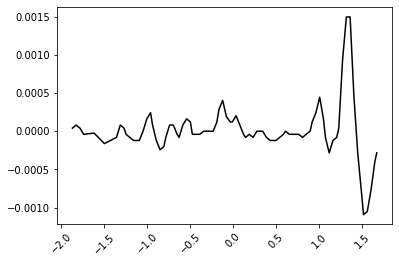

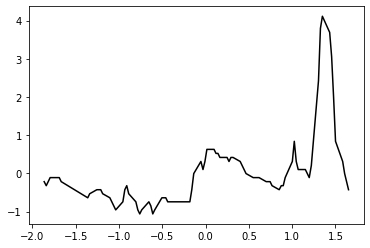

In [244]:
d = g.rolling(3).mean()
d = normalize(d)
dott = d[derive(d[glbl]) > 0.00002]
downdott = d[derive(d[glbl]) < -0.00002]
#plt.plot(d.t_, d[glbl])
plt.plot(d.t_, derive(d[glbl]), color = 'black')
#plt.plot(dott.t_, dott[glbl], color='red', linestyle='none', marker='*')
#plt.plot(downdott.t_, downdott[glbl], color='green', linestyle='none', marker='*')

plt.xticks(rotation=45)
plt.show()
plt.plot(normalize(g.t_), normalize(g[glbl]), color = 'black')

<AxesSubplot:>

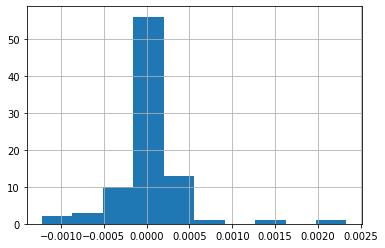

In [246]:
derive(g[glbl]).hist()

<AxesSubplot:>

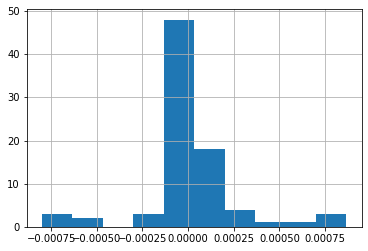

In [270]:
x = g.rolling(5).mean()
derive(x[glbl]).hist() 


In [261]:
sum(derive(g[glbl])<=-0.001)

2

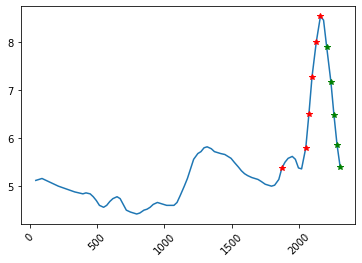

In [271]:
up = 0.00025
down = -0.00025
d = g.rolling(5).mean()
dott = d[derive(d[glbl]) >= up]
downdott = d[derive(d[glbl]) <= down]
#plt.plot(d.t_, d[glbl])
plt.plot(d.t_, d[glbl])
plt.plot(dott.t_, dott[glbl], color='red', linestyle='none', marker='*')
plt.plot(downdott.t_, downdott[glbl], color='green', linestyle='none', marker='*')

plt.xticks(rotation=45)
plt.show()
#plt.plot(normalize(g.t_), normalize(g[glbl]), color = 'black')

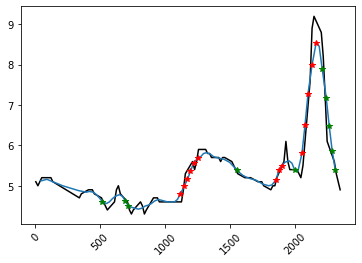

In [272]:
up = 0.0001
down = -0.0001
d = g.rolling(5).mean()
dott = d[derive(d[glbl]) >= up]
downdott = d[derive(d[glbl]) <= down]
#plt.plot(d.t_, d[glbl])
plt.plot(g.t_, g[glbl], color='black')
plt.plot(d.t_, d[glbl])
plt.plot(dott.t_, dott[glbl], color='red', linestyle='none', marker='*')
plt.plot(downdott.t_, downdott[glbl], color='green', linestyle='none', marker='*')

plt.xticks(rotation=45)
plt.show()
#plt.plot(normalize(g.t_), normalize(g[glbl]), color = 'black')

In [ ]:
up = 0.0001
down = -0.0001
d = g.rolling(5).mean()
dott = d[derive(d[glbl]) >= up]
downdott = d[derive(d[glbl]) <= down]
#plt.plot(d.t_, d[glbl])
plt.plot(g.t_, g[glbl], color='black')
plt.plot(d.t_, d[glbl])
plt.plot(dott.t_, dott[glbl], color='red', linestyle='none', marker='*')
plt.plot(downdott.t_, downdott[glbl], color='green', linestyle='none', marker='*')

plt.xticks(rotation=45)
plt.show()
#plt.plot(normalize(g.t_), normalize(g[glbl]), color = 'black')

In [ ]:
plt

/Users/ismail/precision/repos/glyco/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:584: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1361fcf40> has a label of '_1' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/Users/ismail/precision/repos/glyco/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:584: UserWarning: The handle <matplotlib.lines.Line2D object at 0x136202820> has a label of '_2' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/Users/ismail/precision/repos/glyco/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:584: UserWarning: The handle <matplotlib.lines.Line2D object at 0x136202bb0> has a label of '_3' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


<AxesSubplot:xlabel='dtime'>

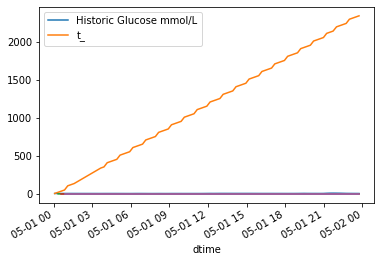

In [254]:
g.plot()

In [238]:
normalize(d)

,Historic Glucose mmol/L,t_,_1,_2,_3
dtime,,,,,
2020-05-01 00:05:00,NaN,NaN,NaN,NaN,NaN
2020-05-01 00:21:00,NaN,NaN,NaN,NaN,NaN
2020-05-01 00:36:00,-0.267307,-1.890902,NaN,NaN,NaN
2020-05-01 00:51:00,-0.230875,-1.867266,0.104725,NaN,NaN
2020-05-01 01:06:00,-0.158012,-1.823590,0.211270,0.192612,NaN
...,...,...,...,...,...
2020-05-01 22:45:00,2.027891,1.514810,-3.084516,-1.332042,1.073396
2020-05-01 23:00:00,1.080666,1.558486,-2.970869,0.204250,1.660415
2020-05-01 23:15:00,0.388464,1.602162,-2.175334,1.321554,1.208379


In [201]:
y5[derive(y5[glbl])==0]

,Historic Glucose mmol/L,t_,_1,_2,_3
dtime,,,,,
2020-05-01 11:25:00,4.6,1071.0,3.523657e-20,0.0,-2.743484e-11


In [ ]:
y5[glbl]

# Integral

In [294]:
def get_integral(df):
    return sum((df.t_.diff() * df[glbl]).dropna())

In [295]:

d = g.rolling(5).mean()

In [296]:
get_integral(g)


12389.199999999999

In [299]:
get_integral(normalize(g))

-0.03717481595585288

In [300]:
get_integral(normalize(d))

-0.05029277929379739

In [297]:
get_integral(d)

12000.280000000006

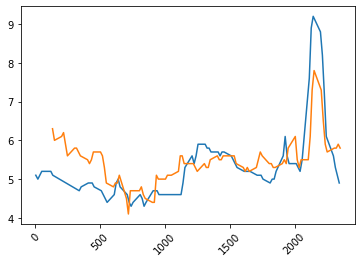

In [298]:
plt.plot(g.t_, g[glbl])
plt.plot(g1.t_, g1[glbl])
plt.xticks(rotation=45)
plt.show()

In [305]:
itgs = [get_integral(normalize(gl.loc[i])) for i in ['2020-05-{}'.format(j) for j in range(1,30)]]

In [337]:
itgsAb = [get_integral(gl.loc[i]) for i in ['2020-05-{}'.format(j) for j in range(1,30)]]

In [309]:
for j in range(1,30):
    for i in ['2020-05-{}'.format(j)]:
        print('>> Day: {}'.format(i))
        print(get_integral(normalize(gl.loc[i])))
        
specialhigh = '2020-05-8'
speciallow = '2020-05-2'
specialiso = '2020-05-4'

>> Day: 2020-05-1
-0.03717481595585288
>> Day: 2020-05-2
-0.26645239438181473
>> Day: 2020-05-3
-0.0616663278753712
>> Day: 2020-05-4
0.004126335344695592
>> Day: 2020-05-5
0.004810153870088012
>> Day: 2020-05-6
-0.028968930001407205
>> Day: 2020-05-7
-0.04283665573533411
>> Day: 2020-05-8
0.5308531769257332
>> Day: 2020-05-9
0.20439172314749743
>> Day: 2020-05-10
0.06555406844925982
>> Day: 2020-05-11
-0.031912481433473444
>> Day: 2020-05-12
0.1359696548108028
>> Day: 2020-05-13
0.12369953149628901
>> Day: 2020-05-14
0.025810239833528217
>> Day: 2020-05-15
-0.09462358910309505
>> Day: 2020-05-16
0.12045343127824489
>> Day: 2020-05-17
0.046141438729047676
>> Day: 2020-05-18
0.05435249287007009
>> Day: 2020-05-19
-0.006395748408143586
>> Day: 2020-05-20
-0.012956936869804918
>> Day: 2020-05-21
0.07264241726374532
>> Day: 2020-05-22
-0.00892089239316093
>> Day: 2020-05-23
-0.0810905731276379
>> Day: 2020-05-24
0.014198017437344862
>> Day: 2020-05-25
-0.07243673196787095
>> Day: 2020-05-2

(array([1., 2., 9., 8., 6., 2., 0., 0., 0., 1.]),
 array([-0.26645239, -0.18672184, -0.10699128, -0.02726072,  0.05246983,
         0.13220039,  0.21193095,  0.29166151,  0.37139206,  0.45112262,
         0.53085318]),
 <BarContainer object of 10 artists>)

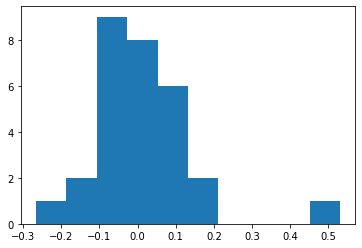

In [307]:
plt.hist(itgs)

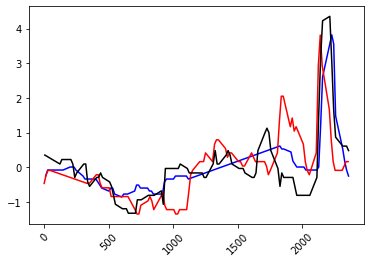

In [333]:
gs1 = gl.loc[specialhigh]
gs2 = gl.loc[speciallow]
gs3 = gl.loc[specialiso]

plt.plot(gs1.t_, normalize(gs1[glbl]), color='blue')
plt.plot(gs2.t_, normalize(gs2[glbl]), color='red')
plt.plot(gs3.t_, normalize(gs3[glbl]), color='black')
plt.xticks(rotation=45)
plt.show()

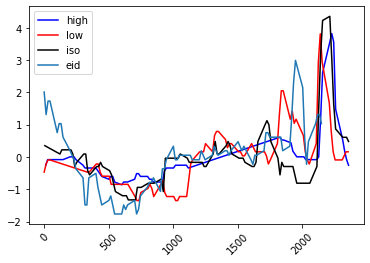

In [336]:
gs1 = gl.loc[specialhigh]
gs2 = gl.loc[speciallow]
gs3 = gl.loc[specialiso]
eid = gl.loc['2020-05-31']

#for i in [gs1, gs2, gs3, eid]:
#    i[glbl]=i[glbl].rolling(5).mean()
plt.plot(gs1.t_, normalize(gs1[glbl]), color='blue', label='high')
plt.plot(gs2.t_, normalize(gs2[glbl]), color='red', label='low')
plt.plot(gs3.t_, normalize(gs3[glbl]), color='black', label='iso')
plt.plot(eid.t_, normalize(eid[glbl]), label='eid')
plt.xticks(rotation=45)
plt.legend()
plt.show()

<AxesSubplot:xlabel='dtime'>

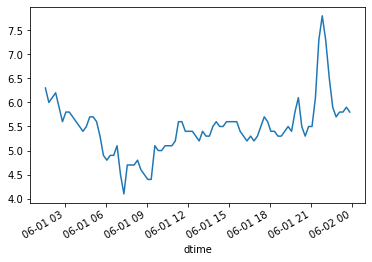

In [318]:
gl.loc['2020-06-01'][glbl].plot()

In [348]:
itgsAb = pd.Series([get_integral(gl.loc[i]) for i in ['2020-05-{}'.format(j) for j in range(1,30)]])

<AxesSubplot:>

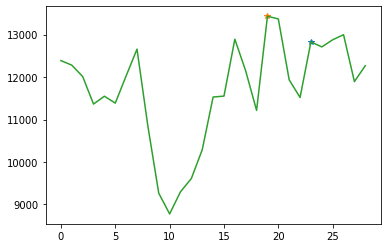

In [359]:
plt.plot([23], [itgsAb[23]], marker='*')
plt.plot([19], [itgsAb[19]], marker='*')
itgsAb.plot()

In [363]:
lowdays = ['2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12']
meddays = ['2020-05-05', '2020-05-06']
highdays = ['2020-05-08', '2020-05-20', '2020-05-24']

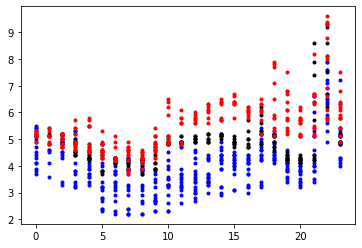

In [393]:
for ldd in lowdays:
    gld = gl.loc[ldd]
    plt.plot(gld.index.hour, gld[glbl], color='blue', linestyle='none', marker='.')
for mdd in meddays:
    mld = gl.loc[mdd]
    plt.plot(mld.index.hour, mld[glbl], color='black', linestyle='none', marker='.')
for hdd in highdays:
    ghd = gl.loc[hdd]
    plt.plot(ghd.index.hour, ghd[glbl], color='red', linestyle='none', marker='.')

[                     Historic Glucose mmol/L    t_
dtime                                             
2020-05-11 00:03:00                      4.5     3
2020-05-11 00:18:00                      4.3    18
2020-05-11 00:33:00                      4.1    33
2020-05-11 01:21:00                      4.6   121
2020-05-11 01:36:00                      4.6   136
...                                      ...   ...
2020-05-11 13:37:00                      NaN  1337
2020-05-11 13:43:00                      NaN  1343
2020-05-11 16:09:00                      NaN  1609
2020-05-11 16:56:00                      NaN  1656
2020-05-11 17:41:00                      NaN  1741

[102 rows x 2 columns]]


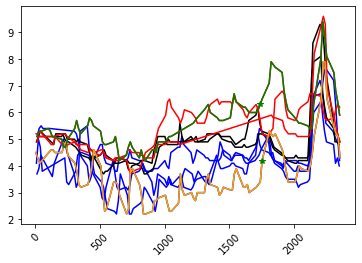

In [394]:
for ldd in lowdays:
    gld = gl.loc[ldd]
    plt.plot(gld.t_, gld[glbl], color='blue')
for mdd in meddays:
    mld = gl.loc[mdd]
    plt.plot(mld.t_, mld[glbl], color='black')
for hdd in highdays:
    ghd = gl.loc[hdd]
    plt.plot(ghd.t_, ghd[glbl], color='red')


gld=gl.loc['2020-05-11']
plt.plot(gld.t_, gld[glbl], color='orange')
#print([1741], [gld[gld.t_>=1741].t_])
print([gld[gld.t_<=1754]])
plt.plot([1754], [gld[gld.t_==1754][glbl]], color='green', marker='*')
    
gld=gl.loc['2020-05-20']
plt.plot(gld.t_, gld[glbl], color='green')
plt.plot([1739], [gld[gld.t_==1739][glbl]], color='green', marker='*')
plt.xticks(rotation=45)
plt.show()


### integral minus min

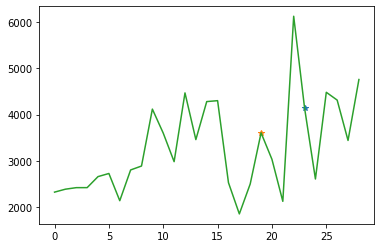

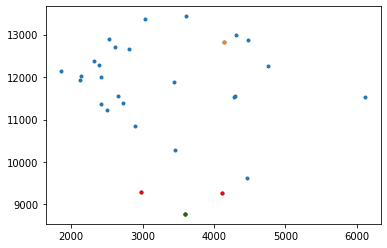

In [448]:
def get_integral_off_min(df):
    sdf = df.copy()
    sdf.dropna(subset=[glbl], inplace=True)
    m = sdf[glbl].min()
    return sum((sdf.t_.diff() * abs(sdf[glbl]-m)).dropna())
               
itgsM =  pd.Series([get_integral_off_min(gl.loc[i]) for i in ['2020-05-{}'.format(j) for j in range(1,30)]])
#itgsM =  pd.Series([get_integral_off_min(gl.loc[i]) for i in ['2020-05-{}'.format(j) for j in range(1,30)]])

plt.plot([23], [itgsM[23]], marker='*')
plt.plot([19], [itgsM[19]], marker='*')
itgsM.plot()
plt.show()
plt.plot(itgsM, itgsAb, linestyle='none', marker='.')
plt.plot(itgsM[9:12], itgsAb[9:12], linestyle='none', marker='.', color='red')
plt.plot(itgsM[10], itgsAb[10], linestyle='none', marker='.', color='green')
plt.plot(itgsM[23], itgsAb[23], marker='.')
plt.show()

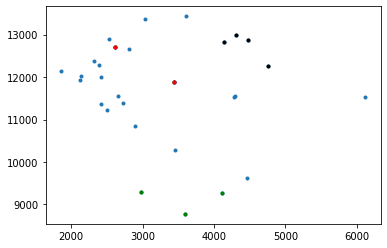

In [449]:
f, ff = itgsM, itgsAb
plt.plot(f, ff, linestyle='none', marker='.')
plt.plot(f[9:12], ff[9:12], linestyle='none', marker='.', color='green')


plt.plot(f[23:], ff[23:], linestyle='none', marker='.', color='black')
plt.plot(f[24], ff[24], linestyle='none', marker='.', color='red')
plt.plot(f[27], ff[27], linestyle='none', marker='.', color='red')
plt.show()

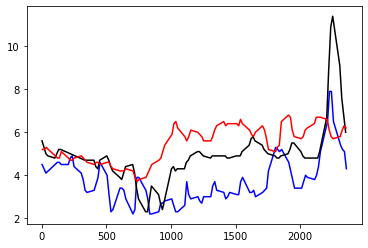

In [453]:

lowdays = ['2020-05-11']
meddays = ['2020-05-23']
highdays = ['2020-05-24']
for ldd in lowdays:
    gld = gl.loc[ldd]
    plt.plot(gld.t_, gld[glbl], color='blue')
for mdd in meddays:
    mld = gl.loc[mdd]
    plt.plot(mld.t_, mld[glbl], color='black')
for hdd in highdays:
    ghd = gl.loc[hdd]
    plt.plot(ghd.t_, ghd[glbl], color='red')

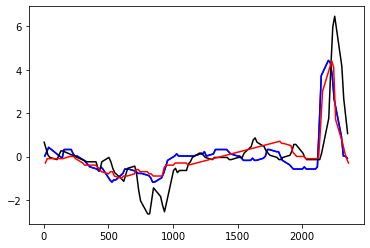

In [451]:

lowdays = ['2020-05-06', '2020-05-06']
meddays = ['2020-05-23']
highdays = ['2020-05-08']
for ldd in lowdays:
    gld = gl.loc[ldd]
    plt.plot(gld.t_, gld[glbl]-gld[glbl].mean(), color='blue')
for mdd in meddays:
    mld = gl.loc[mdd]
    plt.plot(mld.t_, mld[glbl]-mld[glbl].mean(), color='black')
for hdd in highdays:
    ghd = gl.loc[hdd]
    plt.plot(ghd.t_, ghd[glbl]-ghd[glbl].mean(), color='red')

# Sleep

In [1]:
itgs[24]

NameError: name 'itgs' is not defined

# Meals

In [26]:
from datetime import datetime as dt

In [40]:
mtime = '2020-04-30 21'

In [41]:
mday = gl.loc[mtime[:10]]

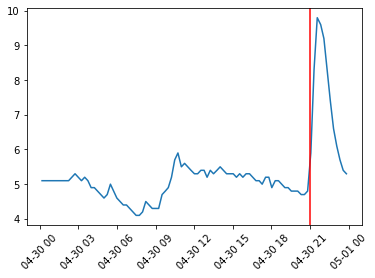

In [53]:
plt.plot(mday.index, mday[glbl])
plt.xticks(rotation=45)
plt.axvline(x=mtime, color='red')
plt.show()

### find peak

In [54]:
mday

,Historic Glucose mmol/L,t_
dtime,,
2020-04-30 00:10:00,5.1,10
2020-04-30 00:25:00,5.1,25
2020-04-30 00:40:00,5.1,40
2020-04-30 01:44:00,5.1,144
2020-04-30 01:59:00,5.1,159
...,...,...
2020-04-30 22:50:00,6.6,2250
2020-04-30 23:05:00,6.1,2305
2020-04-30 23:20:00,5.7,2320


/Users/ismail/precision/repos/glyco/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


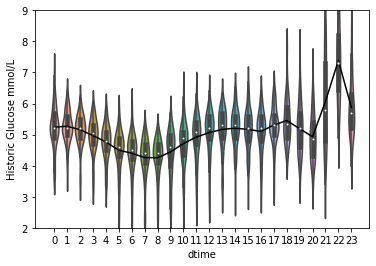

In [60]:
booboo=gl
booboo['H']=gl.index.hour
sns.violinplot(booboo.index.hour, booboo[glbl])
mvar = booboo.groupby(['H'])[glbl].mean()


plt.plot(mvar.index, mvar, color='black')

plt.ylim(2,9)
plt.show()

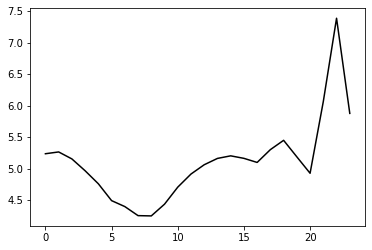

In [64]:
mvar = booboo.groupby(['H'])[glbl].mean()
plt.plot(mvar.index, mvar, color='black')

In [68]:
mvar-mvar.min()

H
0     0.985497
1     1.013944
2     0.903346
3     0.715586
4     0.509388
5     0.242308
6     0.148077
7     0.004487
8     0.000000
9     0.186048
10    0.455840
11    0.663664
12    0.811097
13    0.911319
14    0.952157
15    0.912421
16    0.847503
17    1.050793
18    1.198119
19    0.936011
20    0.676041
21    1.813703
22    3.132951
23    1.625135
Name: Historic Glucose mmol/L, dtype: float64

In [73]:
delt= mvar.diff()

(delt-delt.min()).sum()

35.31941334088533

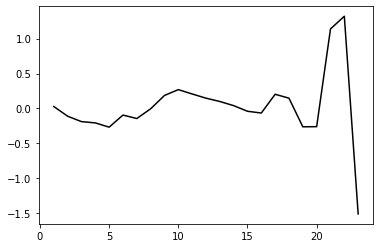

In [74]:
plt.plot(delt.index, delt, color='black')

(array([ 1.,  0.,  0.,  0.,  7., 10.,  3.,  0.,  0.,  2.]),
 array([-1.50781631, -1.22510985, -0.94240339, -0.65969693, -0.37699047,
        -0.09428401,  0.18842246,  0.47112892,  0.75383538,  1.03654184,
         1.3192483 ]),
 <BarContainer object of 10 artists>)

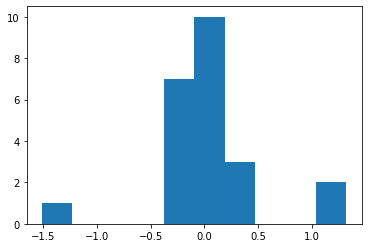

In [75]:
plt.hist(delt)

In [56]:
import seaborn as sns